# MOSEK
MOSEK is a Python Library that does optimizations.

pip install mosek

Please note that you need a license to run MOSEK. Download the license from: https://www.mosek.com/products/academic-licenses/ 

Once you obtain the mosek.lic file, place it in your folder. For me, the folder is: C:\Users\marci\mosek

In this tutorial, we will go over a "hello world" (first) MOSEK program.

Following, we will go over a tutorial for "Linear Optimization".

[Sources: https://docs.mosek.com/9.2/pythonapi/design.html#hello-world-in-mosek https://docs.mosek.com/9.2/pythonapi/tutorial-lo-shared.html]

# Boundaries
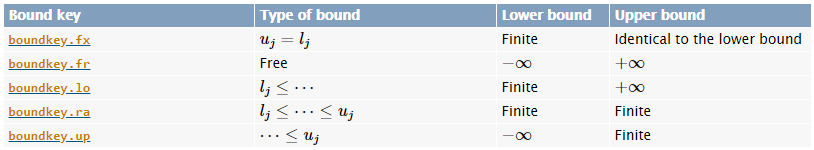

# HELLO WORLD
[Source: https://docs.mosek.com/9.2/pythonapi/design.html#hello-world-in-mosek ]

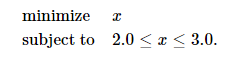

In [4]:
from mosek import *;

x = [ 0.0 ]

with Env() as env:                            # Create Environment
  with env.Task(0, 1) as task:                # Create Task
    task.appendvars(1)                          # 1 variable x
    task.putcj(0, 1.0)                          # c_0 = 1.0
    task.putvarbound(0, boundkey.ra, 2.0, 3.0)  # 2.0 <= x <= 3.0
    task.putobjsense(objsense.minimize)         # minimize

    task.optimize()                      # Optimize

    task.getxx(soltype.itr, x)                  # Get solution
    print("Solution x = {}".format(x[0]))       # Print solution

Solution x = 2.0


# Linear Optimization Example
[Source: https://docs.mosek.com/9.2/pythonapi/tutorial-lo-shared.html ]

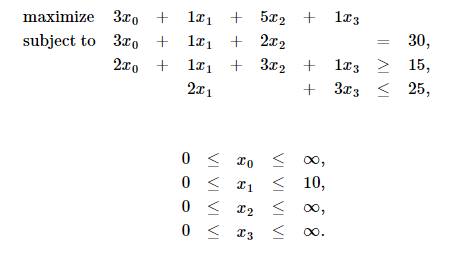

"A" table

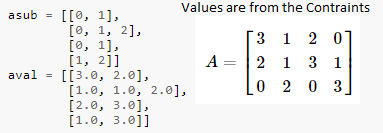

The array aval[j] contains the non-zero values of column j and asub[j] contains the row indices of these non-zeros.

In [5]:
import sys
import mosek

# Since the value of infinity is ignored, we define it solely
# for symbolic purposes
inf = 0.0

# Define a stream printer to grab output from MOSEK
def streamprinter(text):
    sys.stdout.write(text)
    sys.stdout.flush()


def main(): #All of the Program is run from "main()". This is called at the end of this script
    # Make mosek environment, all mosek tasks must be run in the mosek environment
    with mosek.Env() as env:
        # Create an optimization task
        # Task (numcon, numvar)
        #       numcon (int) – An optional hint about the maximal number of constraints in the task. (input)
        #       numvar (int) – An optional hint about the maximal number of variables in the task. (input)
        with env.Task() as task:
            # Attach a log stream printer to the task - This ensures that outputs are attached to the task object
            task.set_Stream(mosek.streamtype.log, streamprinter)

            # Bound keys for constraints
            bkc = [mosek.boundkey.fx,
                   mosek.boundkey.lo,
                   mosek.boundkey.up]
            # Bound values for constraints
            blc = [30.0, 15.0, -inf]
            buc = [30.0, +inf, 25.0]

            
            # Bound keys for variables
            bkx = [mosek.boundkey.lo,
                   mosek.boundkey.ra,
                   mosek.boundkey.lo,
                   mosek.boundkey.lo]
            # Bound values for variables
            blx = [0.0, 0.0, 0.0, 0.0]
            bux = [+inf, 10.0, +inf, +inf]

            
            # Objective coefficients
            c = [3.0, 1.0, 5.0, 1.0]

            
            # Below is the sparse representation of the A
            # matrix stored by column.
            asub = [[0, 1],
                    [0, 1, 2],
                    [0, 1],
                    [1, 2]]
            aval = [[3.0, 2.0],
                    [1.0, 1.0, 2.0],
                    [2.0, 3.0],
                    [1.0, 3.0]]

            # Numnber of variables and number of contraints
            numvar = len(bkx)
            numcon = len(bkc)

            # Append these ranges to the task object
            # Append 'numcon' empty constraints.
            # The constraints will initially have no bounds.
            task.appendcons(numcon)
            # Append 'numvar' variables.
            # The variables will initially be fixed at zero (x=0).
            task.appendvars(numvar)

            for j in range(numvar):
                # Set the linear term c_j in the objective.
                # The j position of c[], has value of c[j] 
                task.putcj(j, c[j])

                # Set boundaries for the variables
                # Set the bounds on variable j
                # blx[j] <= x_j <= bux[j]
                # bkx = type of contraint
                # blx = lower boundary
                # bux = upper boundary
                task.putvarbound(j, bkx[j], blx[j], bux[j])

                # Input column j of A
                task.putacol(j,                  # Variable (column) index.
                             asub[j],            # Row index of non-zeros in column j.
                             aval[j])            # Non-zero Values of column j.

            # Set the bounds on constraints.
             # blc[i] <= constraint_i <= buc[i]
            for i in range(numcon):
                # Set boundaries for the constraints
                # bkc = type of contraint
                # blc = lower boundary
                # buc = upper boundary
                task.putconbound(i, bkc[i], blc[i], buc[i])


                
            # Choose the optimization type: minimize / maximize
            # Input the objective sense (minimize/maximize)
            task.putobjsense(mosek.objsense.maximize)
            # Solve the problem
            task.optimize()
            
            
            
            # Print a summary containing information
            # about the solution for debugging purposes
            task.solutionsummary(mosek.streamtype.msg)

            print()
            print("***")
            # Get status information about the solution
            solsta = task.getsolsta(mosek.soltype.bas)

            if (solsta == mosek.solsta.optimal):
                xx = [0.] * numvar
                task.getxx(mosek.soltype.bas, # Request the basic solution.
                           xx)
                print("Optimal solution: ")
                for i in range(numvar):
                    print("x[" + str(i) + "]=" + str(xx[i]))
            elif (solsta == mosek.solsta.dual_infeas_cer or
                  solsta == mosek.solsta.prim_infeas_cer):
                print("Primal or dual infeasibility certificate found.\n")
            elif solsta == mosek.solsta.unknown:
                print("Unknown solution status")
            else:
                print("Other solution status")


In [6]:
# call the main function
try:
    main()
except mosek.Error as e:
    print("ERROR: %s" % str(e.errno))
    if e.msg is not None:
        print("\t%s" % e.msg)
        sys.exit(1)
except:
    import traceback
    traceback.print_exc()
    sys.exit(1)

Problem
  Name                   :                 
  Objective sense        : max             
  Type                   : LO (linear optimization problem)
  Constraints            : 3               
  Cones                  : 0               
  Scalar variables       : 4               
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sens